# Training and Testing

In this section we put together everything we learned about images and features so that we can train a machine learning algorithm to distinguish between the images of different tags.

In [6]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

## Loading the Dataset

We'll start by loading the entire dataset of images and labelling each of the images

Using glob
flattening

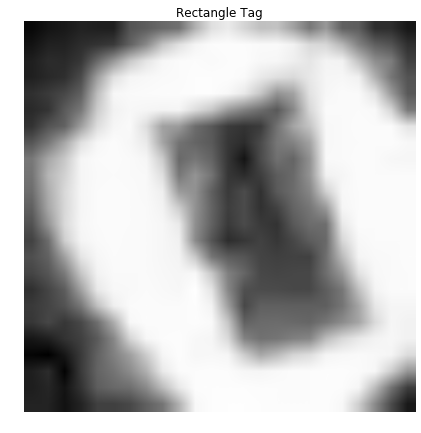

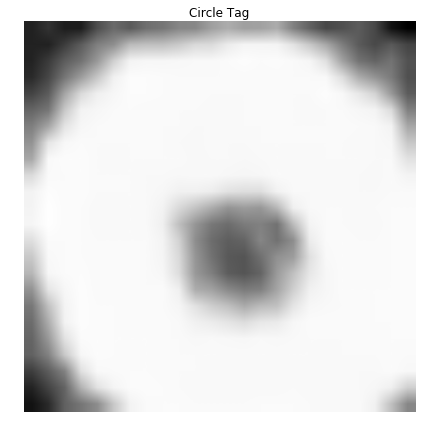

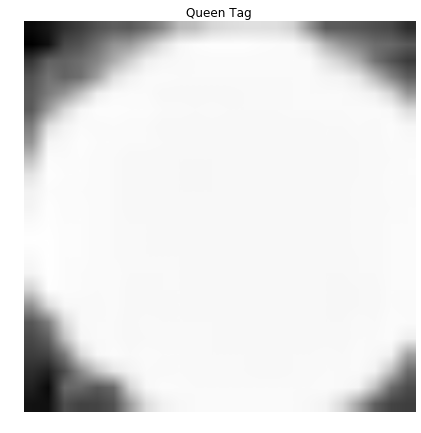

In [5]:
import glob

rect_tag_files = glob.glob('data/I/*.png')
circle_tag_files = glob.glob('data/O/*.png')
queen_tag_files = glob.glob('data/Q/*.png')

rect_image =    cv2.imread(rect_tag_files[0], cv2.IMREAD_GRAYSCALE)
circle_image =  cv2.imread(circle_tag_files[0], cv2.IMREAD_GRAYSCALE)
queen_image =   cv2.imread(queen_tag_files[0], cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (10, 7))
plt.title('Rectangle Tag')
plt.axis('off')
plt.imshow(rect_image,  cmap = cm.Greys_r)

plt.figure(figsize = (10, 7))
plt.title('Circle Tag')
plt.axis('off')
plt.imshow(circle_image,  cmap = cm.Greys_r)

plt.figure(figsize = (10, 7))
plt.title('Queen Tag')
plt.axis('off')
plt.imshow(queen_image,  cmap = cm.Greys_r)

## Classes
If you recall from earlier, the three different tag types, indicated a different group in the experiment.

Tag Number             |  Pattern   | Details
:-------------------------:|:-------------------------: | :-------------------------:
1  |  Rectangle | 100 bees that were not exposed to any drugs
2  |  Circle    | 100 bees that were treated with caffeine
3  | Blank      | Single queen in the colony received this tag

Just like in statistics, machine learning algorithms require that we refer to each image as a number, like levels in a factor. In the case of machine learning however, these levels are called classes. We'll now assign each of the numbers in the table above in a list for every single tag image that we have. Once we do this, let's output the number of images and the number of classifications we've made to check that they match.

In [10]:
rect_tag_class = len(rect_tag_files) * [1]
circle_tag_class = len(circle_tag_files) * [2]
queen_tag_class = len(queen_tag_files) * [3]

print(len(rect_tag_files), len(rect_tag_class), rect_tag_files[0], rect_tag_class[0])
print(len(circle_tag_files), len(circle_tag_class), circle_tag_files[0], circle_tag_class[0])
print(len(queen_tag_files), len(queen_tag_class), queen_tag_files[0], queen_tag_class[0])

310 310 data/I/108282.png 1
312 312 data/O/100752.png 2
108 108 data/Q/104823.png 3


## Reading and Flattening the Images

We now need to read in the image files we have listed

In [11]:
all_tag_files = []
all_tag_files.extend(rect_tag_files)
all_tag_files.extend(circle_tag_files)
all_tag_files.extend(queen_tag_files)

all_classifications = []
all_classifications.extend(rect_tag_class)
all_classifications.extend(circle_tag_class)
all_classifications.extend(queen_tag_class)

all_images_flat = []
for image_file in all_tag_files:
    read_image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    flat_image = read_image.flatten()
    all_images_flat.append(flat_image)

X = np.array(all_images_flat)
y = np.array(all_classifications)

print(X.shape, y.shape)

(730, 576) (730,)


## Splitting a training and testing dataset

In [ ]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

## Clustering - PCA, K means, supervised clustering - LDA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
plt.figure(figsize = (35, 20))
plt.scatter(X_r[:, 0], X_r[:, 1], c=y, s=200)

lda = LDA(n_components=2)
lda = lda.fit(X_train, y_train)
X_lda = lda.transform(X_train)
Z = lda.transform(X_test)
plt.figure(figsize = (35, 20))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, s=200)

## SVM Classification

In [ ]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(gamma=0.001, C=10)
clf.fit(X_lda, y_train)
y_pred = clf.predict(Z)

print metrics.accuracy_score(y_test, y_pred)